# Mô hình YOLO Version 3


## Chuẩn bị mô hình 

### Cài đặt Darknet

In [ ]:
# Cài đặt DarkNet

!git clone https://github.com/pjreddie/darknet

%cd ./darknet

!make 

### Chuẩn bị các mô hình đã huấn luyện sẵn

In [ ]:
# Tạo thư mục chứa các pretrained models
!mkdir models 

# Chuyển vào thư mục models
%cd ./models 


# Tải bộ trọng số đã huấn luyện (pretrained model)
!wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet/models
--2020-07-17 02:56:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   290KB/s    in 17m 11s 

2020-07-17 03:13:50 (235 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



### Chuẩn bị dữ liệu 

- Chuẩn bị dữ liệu cho dự đoán một ảnh

- Chuẩn bị dữ liệu cho dữ đoán nhiều ảnh

- Chuẩn bị dữ liệu là video


In [ ]:
# Tạo dữ liệu để 
%cd /content/darknet

!mkdir test_data

%cd ./test_data

!mkdir single_image

!mkdir multiple_image

!mkdir video

!mkdir result

/content/darknet
mkdir: cannot create directory ‘test_data’: File exists
/content/darknet/test_data
mkdir: cannot create directory ‘single_image’: File exists
mkdir: cannot create directory ‘multiple_image’: File exists
mkdir: cannot create directory ‘video’: File exists


In [ ]:
# Chuẩn bị hình ảnh đơn

# Tải hình ảnh 
!wget -P /content/darknet/test_data/single_image https://miro.medium.com/max/1744/1*EYFejGUjvjPcc4PZTwoufw.jpeg

# Đổi lại tên của ảnh
!mv /content/darknet/test_data/single_image/1*EYFejGUjvjPcc4PZTwoufw.jpeg /content/darknet/test_data/single_image/img_01.jpeg

In [ ]:
# Chuẩn bị nhiều hình ảnh trong thư mục 

!wget -P /content/darknet/test_data/multiple_image https://api.time.com/wp-content/uploads/2015/02/cats.jpg

!mv /content/darknet/test_data/multiple_image/cats.jpg /content/darknet/test_data/multiple_image/img_01.jpg

!wget -P /content/darknet/test_data/multiple_image https://blogs.worldbank.org/sites/default/files/styles/card/public/blogs-images/2020-07/pe-social_distancing_buses_lima.jpg

!mv /content/darknet/test_data/multiple_image/pe-social_distancing_buses_lima.jpg /content/darknet/test_data/multiple_image/img_02.jpg

--2020-07-17 04:14:37--  https://api.time.com/wp-content/uploads/2015/02/cats.jpg
Resolving api.time.com (api.time.com)... 192.0.66.64, 2a04:fa87:fffd::c000:4240
Connecting to api.time.com (api.time.com)|192.0.66.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207583 (203K) [image/jpeg]
Saving to: ‘/content/darknet/test_data/multiple_image/cats.jpg.1’

cats.jpg.1          100%[===================>] 202.72K  --.-KB/s    in 0.05s   

2020-07-17 04:14:37 (4.25 MB/s) - ‘/content/darknet/test_data/multiple_image/cats.jpg.1’ saved [207583/207583]

--2020-07-17 04:14:40--  https://blogs.worldbank.org/sites/default/files/styles/card/public/blogs-images/2020-07/pe-social_distancing_buses_lima.jpg
Resolving blogs.worldbank.org (blogs.worldbank.org)... 104.17.188.11, 104.17.187.11, 2606:4700::6811:bc0b, ...
Connecting to blogs.worldbank.org (blogs.worldbank.org)|104.17.188.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167260 (163K) [imag

## Chạy thử mô hình


In [ ]:
from IPython.display import Image, display, clear_output

### Thử nghiệm trên ảnh đơn 


In [ ]:
%cd /content/darknet

!./darknet detect cfg/yolov3.cfg models/yolov3.weights /content/darknet/test_data/single_image/img_01.jpeg


In [ ]:
!mv predictions.jpg test_data/result/img_01_predicted.jpg

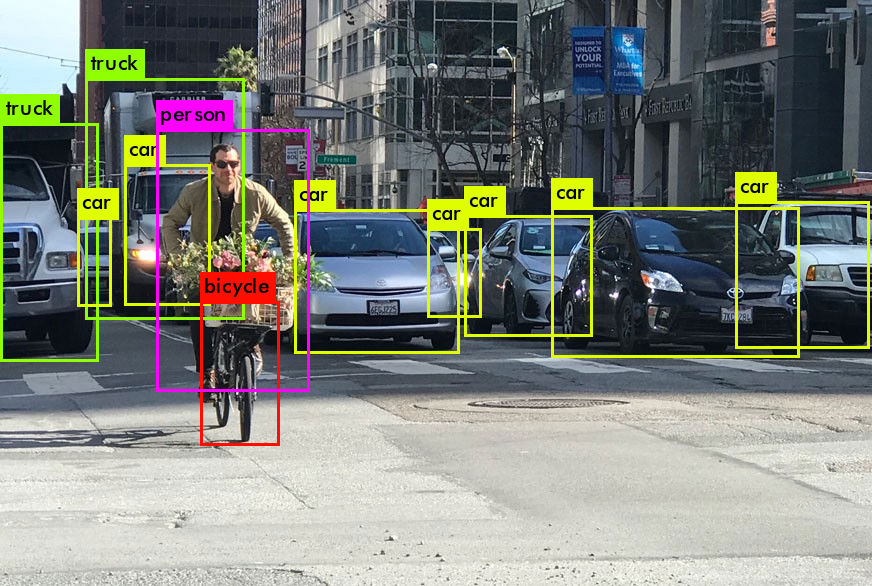

In [ ]:
display(Image('test_data/result/img_01_predicted.jpg'))

### Thử nghiệm trên folder ảnh

In [ ]:

!./darknet detect cfg/yolov3.cfg models/yolov3.weights

# Nhập vào path của ảnh , khi nào dừng thì nhấn tổ hợp phím Ctrl-C

# Ví dụ nhập path ảnh thứ nhất: /content/darknet/test_data/multiple_image/img_01.jpg
# Ví dụ nhập path ảnh thứ hai: /content/darknet/test_data/multiple_image/img_02.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

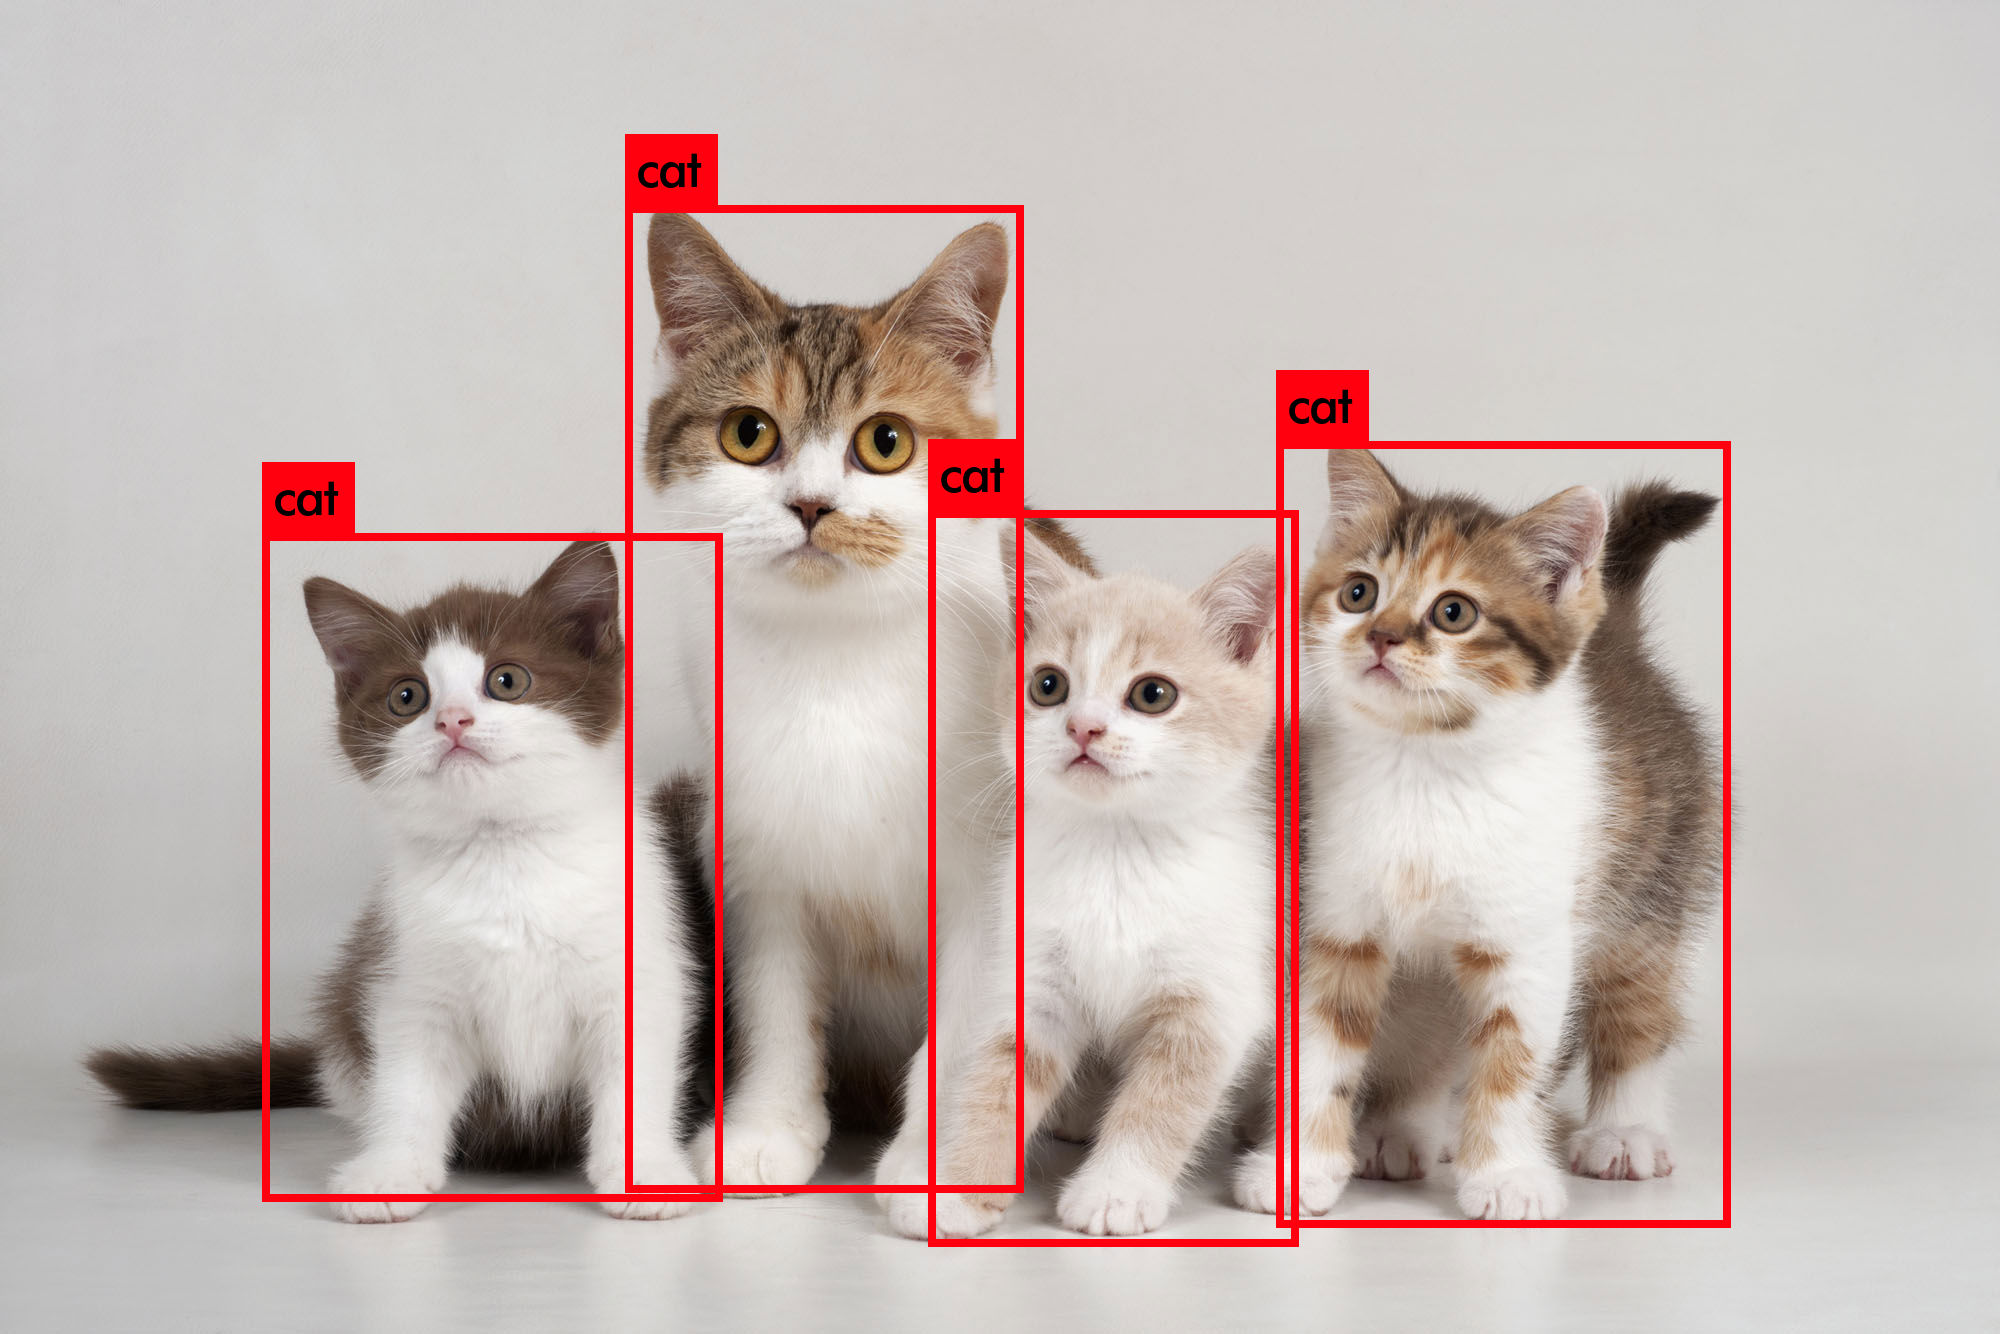

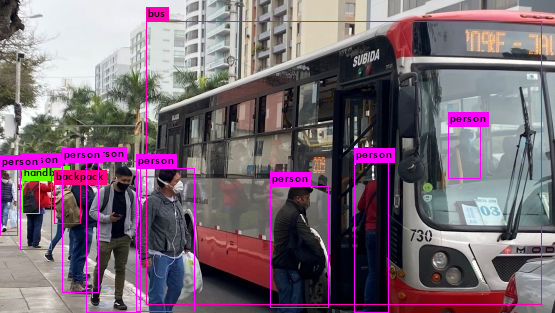

In [ ]:
display(Image('predictions.jpg'))